## Homework 5: Natural language processing

In this assignment, we'll practice reading PDF files, topic modeling, and sentiment analysis.

We'll use [this dataset of emailed comments](https://minneapolis2040.com/media/1411/minneapolis-2040-emailed-responses_062218.pdf) on the Minneapolis 2040 plan. It's in your repostitory as `minneapolis-2040-emailed-responses_062218.pdf`. If you want some background, [check out the city's website](https://minneapolis2040.com/received-public-comments/).

(1) Open the PDF in Python using `pdfminer`. Put the entire text into a string called `pdftxt`.

In [59]:
# your code here
from pdfminer.high_level import extract_text
pdftext = ''

### BEGIN SOLUTION
fn = 'minneapolis-2040-emailed-responses_062218.pdf'
pdftext = extract_text(fn)
### END SOLUTION

In [60]:
# autograder tests - do not edit
print('Text is {} characters long'.format(len(pdftext)))
assert len(pdftext) == 526975

Text is 526975 characters long


(2) If you take a look at the text, it seems that the different comments are separated by the `"Content"` string. 

Split your text into a list of comments using this separator. (This method isn't perfect, but it's a good first approximation.)

In [61]:
comment_list = []  # your list of comments

### BEGIN SOLUTION
comment_list = pdftext.split('Content')
### END SOLUTION

In [62]:
# autograder tests - do not edit

print(len(comment_list))
assert len(comment_list) == 193

193


(3) Now, let's clean up each of these comments. 

First, create a function that removes excess whitespace, punctuation, and stop words from a string. Also remove the following words that are in pretty much every comment: city, plan, Minneapolis, emailed, comments

Your function should take a string and return a cleaned-up string in the form of a list of words.

*Hint*: You'll first want to use regex to remove the excess whitespace and punctuation (and then whitespace again). Then create a list of words using `split()` and remove the stopwords. 

(Don't apply the function to your comment list yet — that's the next question.)

In [67]:
def clean_string(text):
    # your code here
    # it turns text (a string) into a cleaned list of words
    return cleaned_list_of_words


### BEGIN SOLUTION
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

swords = [re.sub(r"[^A-z\s]", "", sword) for sword in stopwords.words('english')]
swords += ['city', 'plan', 'minneapolis', 'emailed', 'comments']

def clean_string(text):
    # remove whitespace
    text = re.sub(r"\s+", " ", text)
    
    # remove punctuation
    text = re.sub(r"[^A-z\s]", "", text)

    # remove whitespace again
    text = re.sub(r"\s+", " ", text)
    
    cleaned_list_of_words = [word for word in word_tokenize(text.lower()) if word not in swords]

    
    return cleaned_list_of_words

### END SOLUTION

In [68]:
# autograder tests - do not edit
newstr = clean_string('A    very dirty 934\t999 string for minneapolis  plan IS like  this')

print(newstr)
assert newstr == ['dirty', 'string', 'like']

['dirty', 'string', 'like']


(4) Now, use your function to clean up the list of comments. Return a new list of cleaned comments.

*Hint*: a list comprehension is the simplest way to do this. But you could also do a regular `for` loop over your `comment_list`.

In [69]:
cleaned_comment_list = []  # your code here

### BEGIN SOLUTION
cleaned_comment_list = [clean_string(cs) for cs in comment_list]

### END SOLUTION

In [ ]:
# autograder tests - do not edit
print(cleaned_comment_list[9][:10])

assert cleaned_comment_list[9][:10] == ['phase', 'super', 'americas', 'problems', 
                            'recent', 'threatened', 'revolt', 'license', 'issues', 'persist']

(5) Estimate an LDA topic model on your cleaned comment list. You could use the same parameters for `num_topics`, `alpha` and `eta` as we did in the video lectures. The challenge problem asks you to go deeper and experiment with different values, but feel free to do so here if you are inclined.

Visualize your topic model using `pyLDAvis`.

In [ ]:
# your code here

### BEGIN SOLUTION

import gensim
dictionary = gensim.corpora.Dictionary(cleaned_comment_list)
corpus = [dictionary.doc2bow(wl) for wl in cleaned_comment_list]
model = gensim.models.LdaMulticore(corpus, id2word=dictionary, num_topics=10, alpha = 0.7, eta=0.5)


import pyLDAvis
import pyLDAvis.gensim_models   # note that in previous versions this was called pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(model, corpus, dictionary)

### END SOLUTION

(6) How do you interpret your topic model results? Explain in a sentence or two, or a few bullet points. 

Your answer here.

(7) Now, it's time for some sentiment analysis!

Write a function that calculates the sentiment score (polarity) for each comment in your (cleaned) list. 

The function should take a list of words and return a score.

*Hint*: Remember the `join()` function!

In [ ]:
def get_sentiment(list_of_words):
    # your code here
    return polarity

### BEGIN SOLUTION
from textblob import TextBlob
def get_sentiment(list_of_words):
    joined_list = ' '.join(list_of_words)
    polarity = TextBlob(joined_list).sentiment.polarity
    return polarity

### END SOLUTION

In [ ]:
# autograder tests - do not edit
print(get_sentiment(['I', 'hate', 'the', 'idea', 'of', 'higher', 'densities']))
assert get_sentiment(['I', 'hate', 'the', 'idea', 'of', 'higher', 'densities'])==-0.275

(8) Now, apply the sentiment score to every string in your list (`cleaned_comment_list`). Create a new list of polarities. 

*Hint*: another list comprehension might be in order.

In [71]:
sentiment_scores = []  # your list here

### BEGIN SOLUTION
sentiment_scores = [get_sentiment(cs) for cs in cleaned_comment_list]
### END SOLUTION

In [72]:
# autograder tests - do not edit
import numpy as np
print(np.round(sentiment_scores[9], 2))
assert np.round(sentiment_scores[9], 2)==0.11

0.11


(8) Finally, plot a histogram of your scores. Make sure to add axis labels where appropriate.

Text(0, 0.5, 'Number of comments')

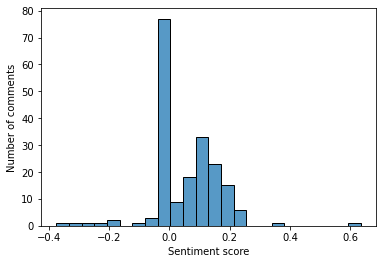

In [73]:
# your code here

### BEGIN SOLUTION
import seaborn as sns
ax = sns.histplot(sentiment_scores)
ax.set_xlabel('Sentiment score')
ax.set_ylabel('Number of comments')
### END SOLUTION

# Challenge Problem
Remember, you need to do at least two of these challenge problems this quarter.

This challenge problem is open ended for you to take in a direction that you are most interested in. Here are some suggestions (do 2-3 of these, or something analagous of your choice).

* For the topic modeling, experiment with `num_topics`, `alpha` and `eta` to get a meaningful set of topics. You might want to clean the data further as well, e.g. through lemmatizing and dropping other words (like we did for "Minneapolis")
* Analyze and plot the sentiment scores for posts that mention different keywords. Do you see a difference for those that mention "density," "zoning", "housing," "parking," etc.? Qualitatively, do the sentiment scores make intuitive sense (e.g. if you examine the most-positive and most-negative comments)?
* Until now, we've only considered the emailed comments. Compare the topics or sentiment scores to public comments received through a different channel ([all comments are here](https://minneapolis2040.com/received-public-comments/)). *Hint*: you could create a mega-function that takes the filename as the argument, and returns a set of topics and/or sentiment scores.
* Other ideas?

In all cases, write some brief interpretation in a markdown cell.